## Machine learning and statistical learning
### Error measure, Overfitting

Author Jean-Baptiste GOMEZ

## 1 Context and objectives

In this exercise, you will be asked to predict a continuous variable using a machine learning
algorithm by varying the values of a hyperparameter of this algorithm. The objective is to
observe the evolution of the measurement error on the training sample as well as on the test
sample, according to the flexibility of the model.
The data used in this exercise give the selling price of cars (in rupees) and provide details on the
caracteristics of the car. These were downloaded from Kaggle and cleaned (you can download
the raw dataset on Kaggle and clean it yourself if you prefer).
The columns of the dataset are the following:

- name: name of the car
- year: year in which the car was bought
- selling_price: price the owner wants to sell the car at (in thousand rupees)
- km_driven: distance completed by the car in km
- fuel: fuel type of the car
- seller_type: tells if car is sold by individual or dealer
- transmission: Gear transmission of the car (Automatic/Manual)
- owner: number of previous owners
- mileage: mileage of the car
- engine: engine capacity of the car
- max_power: max power of engine
- torque: torque of the car
- seats: number of seats in the car
- sample: whether the observation belongs to the training or testing set

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
# Decision Tree classification algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
%matplotlib inline 
import matplotlib.pyplot as plt


## 2 First steps: preparing the data

1. From AMeTICE, download the cars dataset (cars.csv).
2. Load the CSV file into R or Python.

In [2]:
df = pd.read_csv("cars.csv", thousands=",")
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [4]:
df.isnull().sum()/df.count()*100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.000000
engine           2.794992
max_power        2.730030
seats            2.794992
dtype: float64

In [5]:
df = df.fillna(value=float(0))

3. Randomly split your dataset into two parts:
- a train set that will contain 80% of the observations
- a test set that will contain the remaining 20%.


In [6]:
# target variable
Y = df[["selling_price"]]
Y.head(5)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000


In [7]:
X = df.loc[:, df.columns != "selling_price"]
X.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


## 4 Standardization

- Scale the target variable on the training and the validation sets, using the min-max scaler (using the min and max values computed on the training set).

In [8]:
X_year = X[["year"]]
X_year.head(5)

,year
0,2014
1,2014
2,2006
3,2010
4,2007


In [9]:

X.name.value_counts

<bound method IndexOpsMixin.value_counts of 0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 8128, dtype: object>

In [10]:
X_name = X[["name"]]
X_name.head(5)

,name
0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel
4,Maruti Swift VXI BSIII


In [11]:
X = X.loc[:, X.columns != "year"]
X.head(5)

,name,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [12]:
X_num = X[["km_driven", "mileage", "engine", "max_power"]]
X_num.head(5)

,km_driven,mileage,engine,max_power
0,145500,23.40,1248.0,74.00
1,120000,21.14,1498.0,103.52
2,140000,17.70,1497.0,78.00
3,127000,23.00,1396.0,90.00
4,120000,16.10,1298.0,88.20


In [13]:
scaler = preprocessing.MinMaxScaler()
X_num = scaler.fit(X_num).transform(X_num)
X_num = pd.DataFrame(X_num)
X_num.columns = ["km_driven", "mileage", "engine", "max_power"]
X_num.head(5)

,km_driven,mileage,engine,max_power
0,0.061640,0.567442,0.346282,0.1850
1,0.050837,0.514884,0.415649,0.2588
2,0.059310,0.434884,0.415372,0.1950
3,0.053803,0.558140,0.387347,0.2250
4,0.050837,0.397674,0.360155,0.2205


In [14]:
scaler = preprocessing.MinMaxScaler()
Y = scaler.fit(Y).transform(Y)
Y = pd.DataFrame(Y)
Y.columns = ["selling_price"]
Y.head(5)

,selling_price
0,0.042126
1,0.034102
2,0.012839
3,0.019559
4,0.010030


In [15]:
X_obj = X[[ 'fuel', 'seller_type','transmission','owner', 'seats']]
X_obj['seats'] = X_obj['seats'].astype(str)
#X_obj['year'] = X_obj['year'].astype(str)

#X_obj = X_obj.loc[:, X_obj.columns != "name"]
X_obj.head(5)

C:\Users\gomez\AppData\Local\Temp/ipykernel_21492/4146232641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_obj['seats'] = X_obj['seats'].astype(str)


,fuel,seller_type,transmission,owner,seats
0,Diesel,Individual,Manual,First Owner,5.0
1,Diesel,Individual,Manual,Second Owner,5.0
2,Petrol,Individual,Manual,Third Owner,5.0
3,Diesel,Individual,Manual,First Owner,5.0
4,Petrol,Individual,Manual,First Owner,5.0


## Encodage

In [16]:
encode_x_obj= pd.get_dummies(X_obj, sparse = False, drop_first = True, prefix = ['fuel', 'seller_type','transmission','owner', 'seats'])
encode_x_obj.head(5)

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_10.0,seats_14.0,seats_2.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0
0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


## Concatenation

In [17]:
# concatenation
X = pd.concat([encode_x_obj,X_num], axis=1)
X.head(5)

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,...,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,km_driven,mileage,engine,max_power
0,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0.061640,0.567442,0.346282,0.1850
1,1,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0.050837,0.514884,0.415649,0.2588
2,0,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0.059310,0.434884,0.415372,0.1950
3,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0.053803,0.558140,0.387347,0.2250
4,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0.050837,0.397674,0.360155,0.2205


In [18]:
for col in X.columns:
    if col.startswith('seats'):
        X[col] = X[col].astype(float)
    # if col.startswith('year'):
    #     X[col] = X[col].astype(float)
X.head(5)

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,...,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,km_driven,mileage,engine,max_power
0,1,0,0,1,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.061640,0.567442,0.346282,0.1850
1,1,0,0,1,0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.050837,0.514884,0.415649,0.2588
2,0,0,1,1,0,1,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.059310,0.434884,0.415372,0.1950
3,1,0,0,1,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.053803,0.558140,0.387347,0.2250
4,0,0,1,1,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.050837,0.397674,0.360155,0.2205


## Train/Test Split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (6502, 23) (6502, 1)
Test set: (1626, 23) (1626, 1)


4. From the train set, create two datasets:
 - a training set that will contain 80% of the observations from the train set
 - a validation set that waill contain the remining 20%.

In [20]:
x_train1, x_val, y_train1, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=10)
print ('Train1 set:', x_train1.shape,  y_train1.shape)
print ('val set:', x_val.shape,  y_val.shape)

Train1 set: (5201, 23) (5201, 1)
val set: (1301, 23) (1301, 1)


## 3 Getting to know the data: descriptive statistics
1. Compute some summary statistics for the whole dataset (and comment the outputs):
- for numerical variables: mean, minimum, maximum, quartiles
- for categorical variables: for each category: proportion of observations; mean, minimum, maximum, quartiles of the target variable (selling_price)

In [21]:
df.drop(columns=['year','seats']).describe()

,selling_price,km_driven,mileage,engine,max_power
count,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000
mean,6.382718e+05,6.981951e+04,18.802005,1418.965059,89.085848
std,8.062534e+05,5.655055e+04,5.165302,550.735342,38.286222
min,2.999900e+04,1.000000e+00,-1.000000,0.000000,0.000000
25%,2.549990e+05,3.500000e+04,16.251852,1196.000000,67.100000
50%,4.500000e+05,6.000000e+04,19.100000,1248.000000,81.860000
75%,6.750000e+05,9.800000e+04,22.070000,1582.000000,101.250000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000


In [22]:
categorical_columns = df[['name', 'fuel', 'seller_type', 'transmission', 'owner']]
categorical_columns.describe()

,name,fuel,seller_type,transmission,owner
count,8128,8128,8128,8128,8128
unique,2058,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,129,4402,6766,7078,5289


2. Create graphs to show the relationship between the target variable and the explanatory
variables. Comment on these.

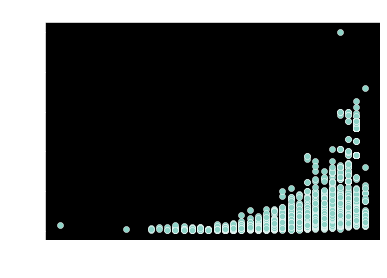

In [23]:
sns.scatterplot(x='year', y='selling_price', data=df)
plt.xlabel('year')
plt.ylabel('selling_price')
plt.title('Scatter Plot: year vs. selling_price')
plt.show()

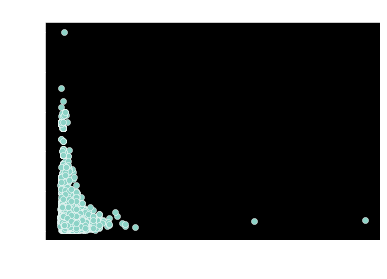

In [24]:
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('Scatter Plot: km_driven vs. selling_price')
plt.show()

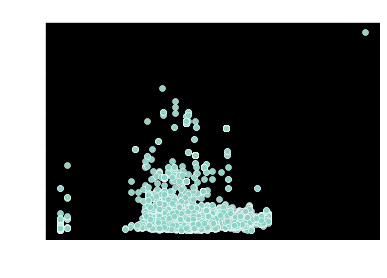

In [25]:
sns.scatterplot(x='mileage', y='selling_price', data=df)
plt.xlabel('mileage')
plt.ylabel('selling_price')
plt.title('Scatter Plot: mileage vs. selling_price')
plt.show()

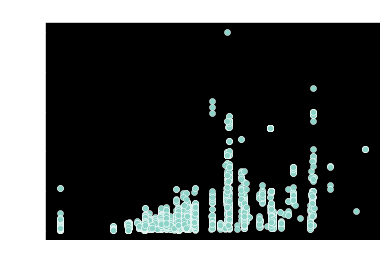

In [26]:
sns.scatterplot(x='engine', y='selling_price', data=df)
plt.xlabel('engine')
plt.ylabel('selling_price')
plt.title('Scatter Plot: engine vs. selling_price')
plt.show()

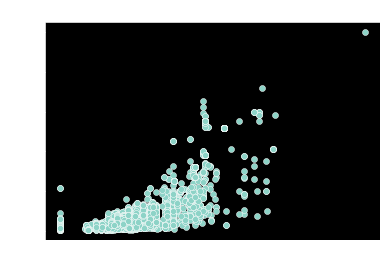

In [27]:
sns.scatterplot(x='max_power', y='selling_price', data=df)
plt.xlabel('max_power')
plt.ylabel('selling_price')
plt.title('Scatter Plot: max_power vs. selling_price')
plt.show()

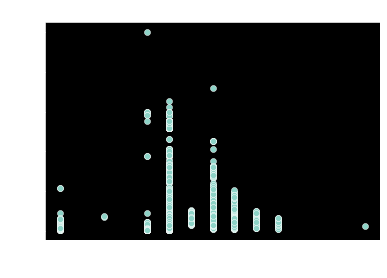

In [28]:
sns.scatterplot(x='seats', y='selling_price', data=df)
plt.xlabel('seats')
plt.ylabel('selling_price')
plt.title('Scatter Plot: seats vs. selling_price')
plt.show()

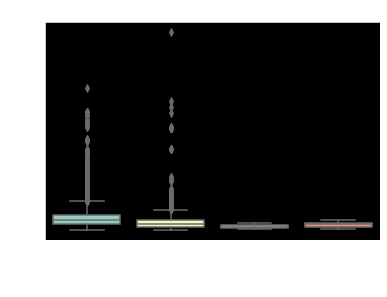

In [29]:
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.xlabel('fuel')
plt.ylabel('selling_price')
plt.title('Box Plot: fuel vs. selling_price')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

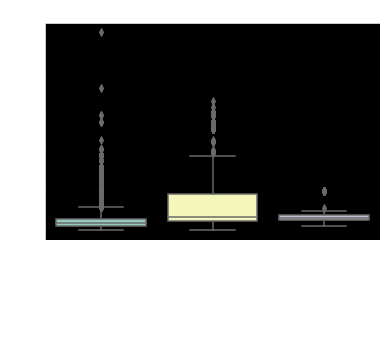

In [30]:
sns.boxplot(x='seller_type', y='selling_price', data=df)
plt.xlabel('seller_type')
plt.ylabel('selling_price')
plt.title('Box Plot: seller_type vs. selling_price')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

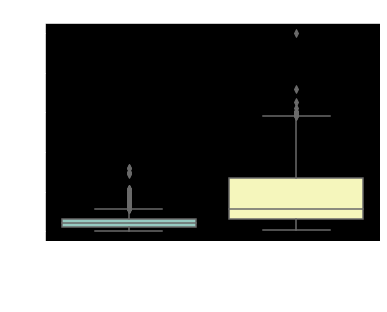

In [31]:
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.xlabel('transmission')
plt.ylabel('selling_price')
plt.title('Box Plot: transmission vs. selling_price')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

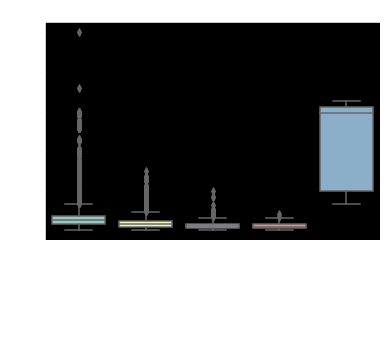

In [32]:
sns.boxplot(x='owner', y='selling_price', data=df)
plt.xlabel('owner')
plt.ylabel('selling_price')
plt.title('Box Plot: owner vs. selling_price')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

## 5 Estimations

You will train two different models: a random forest and a SVM. You will understand in more details how both algorithm work in the subsequent lessons. For now, all you need to understand is that you can vary some hyperparameters for both models. Among the different values that you will try for these hyperparameters, you need to select which provides the best fit, on the validation set.

### 5.1 A first model: Random forest
You will first try to predict the selling price of the cars using a random forest. You will make
3 hyperparameters vary.
1. Using a random forest algorithm, predict the selling price of the car in the training set.
Use the following variables: **year,fuel, km_driven**.


In [33]:
# #x_train1, x_val, y_train1, y_val
# x_train1 = x_train1.drop(columns=["name", "year"])
# x_val = x_val.drop(columns=["name", "year"])
x_train1.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,...,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,km_driven,mileage,engine,max_power
6722,1,0,0,1,0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.025418,0.500000,0.346282,0.22925
4144,0,0,1,1,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.017793,0.378837,0.441454,0.30325
4068,1,0,0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.050837,0.466977,0.438957,0.31550
6457,1,0,0,1,0,1,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.038128,0.292326,0.604606,0.34525
7100,1,0,0,1,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.025418,0.657674,0.290511,0.17250


In [34]:
x_val.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,...,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,km_driven,mileage,engine,max_power
7813,1,0,0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.040246,0.297442,0.604606,0.300000
3958,0,0,1,1,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.013133,0.500233,0.276915,0.167600
4811,0,0,1,1,0,1,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.038128,0.462791,0.276915,0.167750
5521,1,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.033048,0.526977,0.415649,0.258800
5440,0,0,1,1,0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.014827,0.495349,0.276915,0.170125


In [35]:
rfr_model = RandomForestRegressor(n_estimators=20, min_samples_leaf=10, max_features=3, random_state=0)
rfr_model.fit(x_train1,y_train1)

c:\Users\gomez\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features=3, min_samples_leaf=10, n_estimators=20,
                      random_state=0)

In [36]:
# Predict on the training set
y_train_pred = rfr_model.predict(x_train1)
y_train_pred

array([0.04150184, 0.05499061, 0.09964881, ..., 0.01592858, 0.055885  ,
       0.02097588])

2. Compute the mean squared error both for the training and the validation datasets. Compare them with each other.

In [37]:
print('Mean Squared Error training:', mean_squared_error(y_train1,y_train_pred))
# Predict on the validation set
y_val_pred = rfr_model.predict(x_val)
print('Mean Squared Error validation:', mean_squared_error(y_val,y_val_pred))

Mean Squared Error training: 0.0010028459361875943
Mean Squared Error validation: 0.0010663511018504518


3. Now, using a loop, make the minimum size of terminal nodes vary as follows: 10, 20, 30, . . . , 100. At each iteration, compute the mean squared error (and store it) for both samples.

In [38]:
min_samples_leafs = list(range(10, 101, 10))
# Initialize lists to store MSE values
mse_train = [mean_squared_error(y_train1, RandomForestRegressor(n_estimators=20, min_samples_leaf=min_samples_leaf, max_features=3, random_state=0).fit(x_train1, y_train1).predict(x_train1)) for min_samples_leaf in min_samples_leafs]

mse_val = [mean_squared_error(y_val, RandomForestRegressor(n_estimators=20, min_samples_leaf=min_samples_leaf, max_features=3, random_state=0).fit(x_train1, y_train1).predict(x_val)) for min_samples_leaf in min_samples_leafs]




c:\Users\gomez\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\gomez\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\gomez\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\gomez\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

c:\Users\gomez\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\gomez\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\gomez\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\gomez\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

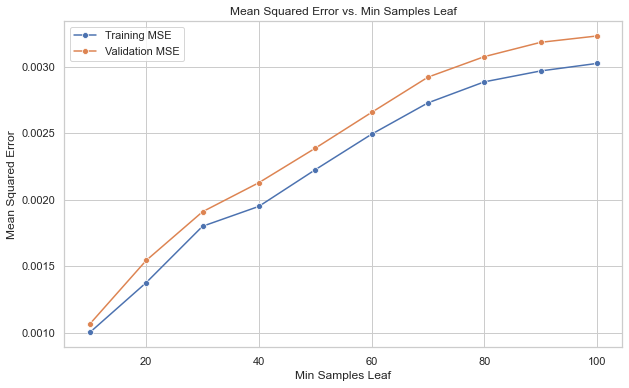

In [39]:
data = pd.DataFrame({'Min_Samples_Leaf': min_samples_leafs,
                     'MSE_Train': mse_train,
                     'MSE_Val': mse_val})
# Set Seaborn style
sns.set(style="whitegrid")

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Min_Samples_Leaf', y='MSE_Train', marker='o', label='Training MSE')
sns.lineplot(data=data, x='Min_Samples_Leaf', y='MSE_Val', marker='o', label='Validation MSE')

# Add labels and a legend
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Min Samples Leaf')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

5. What is the value for your hyperparameter (the cost here, as you only consider a linear kernel in this exercise) that provide the best fit with regard to the MSE?

In [40]:
# Find the best min_samples_leaf value
best_min_samples_leaf = min_samples_leafs[np.argmin(mse_val)]
print('Best min_samples_leaf:', best_min_samples_leaf)

Best min_samples_leaf: 10


## 5.2 A second model: SVM

Now you will train another machine learning model: a support vector machine. You will only
consider a linear kernel, and make only one hyperparameter vary (called the cost parameter;
low values for this hyperparameter lead to a smoother decision surface)

1. Using a Support Vector Machine (SVM) with a linear kernel, predict the selling price of the car in the training set. Use the following variables: year, fuel, km_driven.

In [41]:
svm_model = SVR(kernel='linear', C=10)
svm_model.fit(x_train1,y_train1)

c:\Users\gomez\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, kernel='linear')

In [42]:
# Predict on the training set
y_train_pred = svm_model.predict(x_train1)
y_train_pred

array([ 0.02943913,  0.09302204,  0.14512638, ..., -0.0356581 ,
        0.04725823, -0.00393345])

2. Compute the mean squared error both for the training and the validation datasets. Compare them with each other.

In [43]:
print('Mean Squared Error training:', mean_squared_error(y_train1,y_train_pred))
# Predict on the validation set
y_val_pred = svm_model.predict(x_val)
print('Mean Squared Error validation:', mean_squared_error(y_val,y_val_pred))


Mean Squared Error training: 0.002569554665420304
Mean Squared Error validation: 0.0026587511305337587


3. Now, using a loop, make the cost vary:
 - with R: 10ˆseq(3, -2, length = 50)
 - with python: 10**np.linspace(start=3, stop=-2, num=50)

At each iteration, compute the mean squared error (and store it) for both samples.

In [44]:
cost = 10**np.linspace(start=3, stop=-2, num=50)
# Initialize lists to store MSE values
mse_train = [mean_squared_error(y_train1, SVR(kernel='linear', C=cost_values).fit(x_train1, y_train1).predict(x_train1)) for cost_values in cost ]

mse_val = [mean_squared_error(y_val, SVR(kernel='linear', C=cost_values).fit(x_train1, y_train1).predict(x_val)) for cost_values in cost]


c:\Users\gomez\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\gomez\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gomez\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gomez\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gomez\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

4. On a graph, plot the mean squared error as a function of the node size, for both samples (one curve for each sample). Comment.

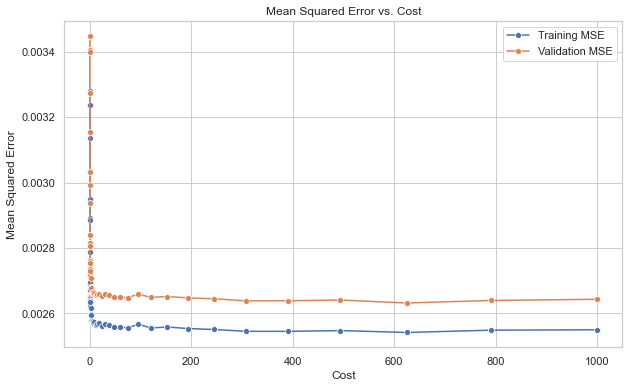

In [45]:
data1 = pd.DataFrame({'Cost': cost,
                     'MSE_Train': mse_train,
                     'MSE_Val': mse_val})
# Set Seaborn style
sns.set(style="whitegrid")

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=data1, x='Cost', y='MSE_Train', marker='o', label='Training MSE')
sns.lineplot(data=data1, x='Cost', y='MSE_Val', marker='o', label='Validation MSE')

# Add labels and a legend
plt.xlabel('Cost')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Cost')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

5. What are the values for your hyperparameters (the number of trees, the number of variables randomly sampled as candidates at each split, and the minimum size of terminal nodes) that provide the best fit with regard to the MSE?

### another way to check the best value of the hyperparameters C (cost) 

In [46]:

# C_values = 10**np.linspace(start=3, stop=-2, num=50)
# # Create the parameter grid for GridSearchCV
# param_grid = {'C': C_values}

# svm_model = SVR(kernel='linear')

# # Create a GridSearchCV object
# svm_cv = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='neg_mean_squared_error')
# svm_cv.fit(x_train1,y_train1)

# print("Best hyperparameters : ",svm_cv.best_params_)

In [47]:
# Find the best min_samples_leaf value
best_cost = cost[np.argmin(mse_val)]
print('Best Cost:', best_cost)

Best Cost: 625.0551925273976


## 5.3 Select your model

Now that you have selected, both for the random forest and for the SVM the values of the
hyperparameters that produce the best fits on the validation set, you can select the model that
gives the best results on the test set.

1. Compute the MSE on the test set for the random forest with the selected values for the hyperparameters.

In [48]:
#X_test = X_test.drop(columns=["year", "name"])
X_test.head(5)

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,...,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,km_driven,mileage,engine,max_power
2077,1,0,0,1,0,1,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.025418,0.418605,0.389845,0.17500
66,0,0,1,1,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.012709,0.520930,0.332131,0.20775
7390,1,0,0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.033891,0.683721,0.346282,0.18505
6308,1,0,0,1,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.012709,0.395349,0.604606,0.35000
4922,0,0,1,1,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.014827,0.455814,0.332131,0.20465


In [49]:
rfr_model = RandomForestRegressor(n_estimators=20, min_samples_leaf=10, max_features=3, random_state=0)
rfr_model.fit(X_test,Y_test)
# Predict on the test set
y_test_pred = rfr_model.predict(X_test)
y_test_pred

print('Mean Squared Error Test rfr:', mean_squared_error(Y_test,y_test_pred))

Mean Squared Error Test rfr: 0.0016928915812907679


c:\Users\gomez\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


2. Do the same for your best SVM.

In [50]:
svm_model = SVR(kernel='linear', C=625.0551925273976)
svm_model.fit(X_test,Y_test)
# Predict on the test set
y_test_pred = svm_model.predict(X_test)
y_test_pred

print('Mean Squared Error Test:', mean_squared_error(Y_test,y_test_pred))

c:\Users\gomez\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error Test: 0.003262448946434483


3. Which model gives the best results on the test set? Comment.

### It is the Random Forest Regressor the best.